In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline
from datetime import datetime
from sklearn import metrics
import math
from statistics import median
import seaborn as sns
import re
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
dffilm = pd.read_csv(Path('./Resources/train.csv'))

In [3]:
#dffilm =dffilm[dffilm['runtime'] !=0]
#dffilm =dffilm[dffilm['revenue'] !=0]
#dffilm =dffilm[dffilm['revenue'] >100]
#dffilm =dffilm[dffilm['budget'] !=0]

dffilm.drop(['id','belongs_to_collection','budget','genres','homepage',
            'imdb_id','original_language','original_title','overview','poster_path','production_companies',
            'production_countries','popularity','runtime','spoken_languages',
            'status','tagline','title','Keywords','cast','crew'], axis=1, inplace=True)


dffilm.head()

,release_date,revenue
0,12/22/12,10703234
1,12/4/03,234748
2,11/15/13,850259
3,10/27/11,12935800
4,8/25/75,39598448


In [4]:
# converting film date to day of year
X_releasedate=dffilm
for m in range(0,len(dffilm.release_date)):
    film_date = dffilm.release_date[m]
    dt = datetime.strptime(film_date, '%m/%d/%y')
    #dffilm.release_date[m] = datetime_object.timetuple().tm_yday
    X_releasedate.release_date[m]= dt.month
    

X_releasedate =X_releasedate[X_releasedate['revenue'] !=0]
X_releasedate =X_releasedate[X_releasedate['revenue'] >100]
X_releasedate =X_releasedate[X_releasedate['release_date'] !=0]

dffilm = X_releasedate
print(X_releasedate)

     release_date    revenue
0              12   10703234
1              12     234748
2              11     850259
3              10   12935800
4               8   39598448
...           ...        ...
2995           10  122700000
2996            6   71000000
2997            5     871279
2998           10      31000
2999            3      65335

[2959 rows x 2 columns]


0       12
1       12
2       11
3       10
4        8
        ..
2995    10
2996     6
2997     5
2998    10
2999     3
Name: release_date, Length: 2959, dtype: object


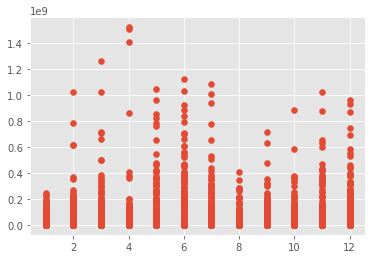

In [5]:
plt.scatter(X_releasedate.release_date, X_releasedate.revenue)
print(dffilm.release_date)

In [6]:
X = dffilm.release_date.values.reshape(-1, 1)
X[:5]

array([[12],
       [12],
       [11],
       [10],
       [8]], dtype=object)

In [7]:
X.shape

(2959, 1)

In [8]:
y=dffilm.revenue

In [9]:
# Create a model with scikit-learn
model = LinearRegression()
model
X
y

0        10703234
1          234748
2          850259
3        12935800
4        39598448
          ...    
2995    122700000
2996     71000000
2997       871279
2998        31000
2999        65335
Name: revenue, Length: 2959, dtype: int64

In [10]:
# Fit the data into the model
model.fit(X, y)

LinearRegression()

In [11]:
# The slope
print(model.coef_)

[820545.65759887]


In [12]:
# The y-intercept
print(model.intercept_)

62090163.42361782


In [13]:
# The model creates predicted y values based on X values
predicted_y_values = model.predict(X)
#print(predicted_y_values)
print(predicted_y_values)
#print(X)

[71936711.31480423 71936711.31480423 71116165.65720536 ...
 66192891.71161215 70295619.99960649 64551800.39641442]


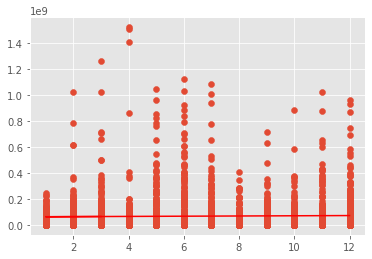

In [14]:
# Plot the results. The best fit line is red.
plt.scatter(X, y)
plt.plot(X,predicted_y_values,color='red')

/Users/vikramjindal/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


TypeError: loop of ufunc does not support argument 0 of type int which has no callable log1p method

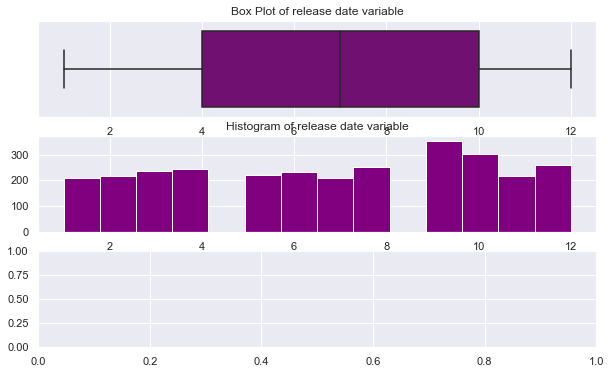

In [16]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=dffilm.release_date, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of release date variable")
sns.distplot(a=dffilm.release_date, kde = False, ax = ax[1], color='purple', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of release date variable")
sns.distplot(a=np.log1p(X_releasedate.release_date), kde = False, ax = ax[2], color='purple', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed release date Histogram")
f.tight_layout()

In [16]:
dffilm['release_date'].describe()

count     3000
unique      12
top          9
freq       362
Name: release_date, dtype: int64